<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/decisionTree_classifieri_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [2]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler , LabelEncoder , minmax_scale
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm import SVC
from  sklearn . tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv('/content/bank.csv')

In [7]:
#to show max columns
pd.set_option('display.max_columns', None)

In [8]:
df.head(5)  # just for a sneak peek

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

for missing values

In [11]:
df.isnull().sum().sort_values(ascending = False)


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


for outliers

In [12]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='balance')
fig.show()

fig = px.box(data_frame=df, y='day')
fig.show()

fig = px.box(data_frame=df, y='duration')
fig.show()

fig = px.box(data_frame=df, y='campaign')
fig.show()

fig = px.box(data_frame=df, y='pdays')
fig.show()

fig = px.box(data_frame=df, y='previous')
fig.show()

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
Q1 = np.percentile(df['balance'], 25)
Q3 = np.percentile(df['balance'], 75)
IQR = Q3 - Q1


lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -2257.0
Upper Bound: 4087.0


In [14]:
data_without_outliers = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
print(data_without_outliers.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [16]:
fig = px.scatter(df , x = 'age' , y = 'balance')
fig.show()

In [17]:
fig = px.violin(df, x='age' , y='balance', color = 'job')
fig.show()

In [18]:
fig = px.histogram(df, x='age',color = 'job')
fig.show()

feature eng

In [19]:
df['age_category'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])
df['balance_category'] = pd.cut(df['balance'], bins=[-np.inf, 0, 1000, 5000, np.inf], labels=['Negative', 'Low', 'Medium', 'High'])
df['duration_category'] = pd.cut(df['duration'], bins=[0, 100, 300, 600, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])
df['campaign_type'] = df['campaign'].apply(lambda x: 'Low' if x <= 5 else 'High')
df['previous_interaction'] = df['previous'].apply(lambda x: 'No Interaction' if x == 0 else 'Interaction')

In [20]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_category,balance_category,duration_category,campaign_type,previous_interaction
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,55-65,Medium,Very Long,Low,No Interaction
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,55-65,Low,Very Long,Low,No Interaction
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,35-45,Medium,Very Long,Low,No Interaction
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,45-55,Medium,Long,Low,No Interaction
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,45-55,Low,Very Long,Low,No Interaction


In [21]:
def encode (df):
  for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
  return df

df =encode (df)


Split the data into Features & **Targets**

In [23]:
X= df.drop(columns='deposit' , axis=1 )
y = df['deposit']


In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [27]:
dt_params = {
    'criterion':  'entropy',
    'max_depth': None,
    'min_samples_split':10,
    'min_samples_leaf': 4
}


dt = DecisionTreeClassifier(**dt_params , random_state= 42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [30]:
acc = accuracy_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
print ('Accuracy:', acc)
print ('F1 Score:', f1)
print ('Precision:', precision)
print ('Recall:', recall)

Accuracy: 0.7765338110165696
F1 Score: 0.7615862398471094
Precision: 0.776803118908382
Recall: 0.746954076850984


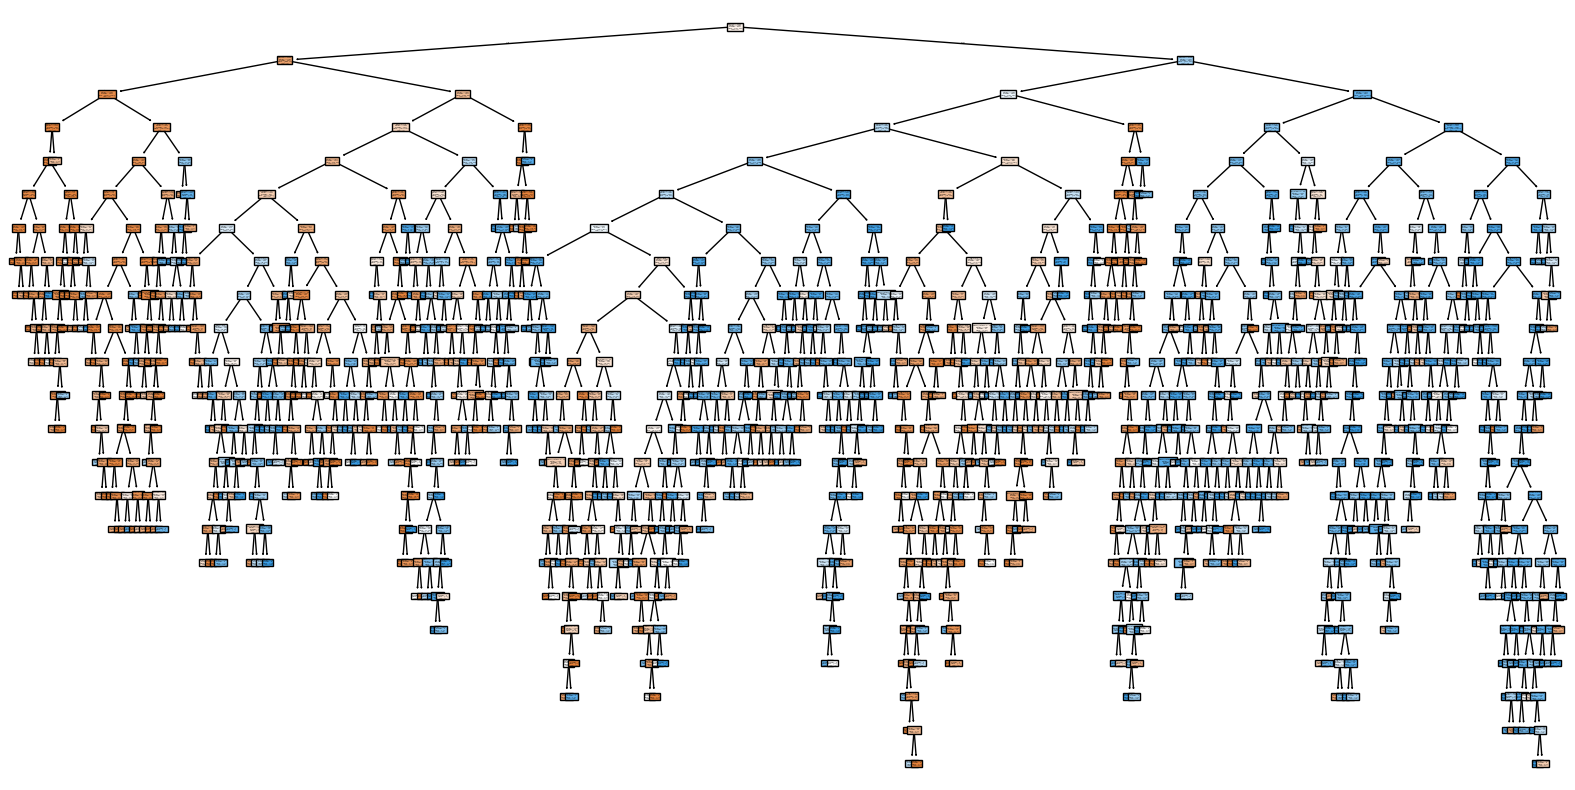

In [31]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='Decision_tree_02.dot', feature_names=X.columns, filled=True, rounded=True)